# Task - numpy

- [x] 基础
- [x] 切片
- [x] 随机
- [x] 正态
- [x] 叠片
- [x] 广播

## numpy 基础

In [2]:
import numpy as np

### 数据类型

- (int32)整数（-2147483648 -- 2147483647） $-2^{31}-1$ to $2^{31}-1$
- (int64)整数（-9223372036854775808 -- 9223372036854775807） $-2^{63}-1$ to $2^{63}-1$
- (float32)单精度浮点数，包括：1 个符号位，8 个指数位，23 个尾数位  1 + 8 + 23 = 32
- (float64)双精度浮点数，包括：1 个符号位，11 个指数位，52 个尾数位  1 + 11 + 52 = 64

> numpy默认的小数是`float64`

In [4]:
a = np.array([1,2,3], dtype = np.float32)
b = np.array([1.2,2.3,3.4], dtype = "int64")
a, b

(array([1., 2., 3.], dtype=float32), array([1, 2, 3]))

### numpy 数组属性

In [5]:
arr = np.asarray([[1,2],[3,4],[5,6]])
print(f'''
arr  \t= {arr}
arr.ndim\t= {arr.ndim}
arr.size\t= {arr.size}
arr.shape\t= {arr.shape} 
''')


arr  	= [[1 2]
 [3 4]
 [5 6]]
arr.ndim	= 2
arr.size	= 6
arr.shape	= (3, 2) 



### 创建数组

In [6]:
print(f'''
{np.empty([2, 2], dtype="int32")}
{np.empty([2, 3])}
{np.empty(3, 'int')}
''')


[[119  97]
 [114 110]]
[[-3.10503618e+231 -3.10503618e+231  6.09343068e-013]
 [ 1.51324713e-110  6.17582057e-322  0.00000000e+000]]
[4613937818241073152 4611686018427387904 4607182418800017408]



In [7]:
print(f'''
from template: np.zeros()
{np.zeros(3)}
{np.zeros([2,3])}
{np.ones([1,2], dtype=np.float64)}

from array:
array: {np.array([1,2,3])}, {type(np.array([1,2,3]))}
asarray: {np.asarray([4,5,6])}, {type(np.asarray([1,2,3]))}

from range:
{np.arange(5)}
{np.arange(1,20,3)}
''')


from template: np.zeros()
[0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]]

from array:
array: [1 2 3], <class 'numpy.ndarray'>
asarray: [4 5 6], <class 'numpy.ndarray'>

from range:
[0 1 2 3 4]
[ 1  4  7 10 13 16 19]



### random

In [8]:
# default
# (0, 1) random
print(np.random.rand())
print(np.random.rand(3,3))
print(np.random.rand(4,))

0.7305616402647424
[[0.14854188 0.73690119 0.75322194]
 [0.79197786 0.5768717  0.02116945]
 [0.44287442 0.12131489 0.70869013]]
[0.81046501 0.83774668 0.00832676 0.52681214]


In [121]:
# random int
print(np.random.randint(10))
print(np.random.randint(10, size=(5,)))
print(np.random.randint(10, size=(2,2)))
print(np.random.randint(1, 8, size=(10,)))
print(np.random.randint(1, 8, size=10))
print(np.random.choice(52, 10, replace=False))

0
[8 7 1 2 5]
[[2 7]
 [6 7]]
[2 2 6 5 5 6 7 2 5 3]
[7 6 5 1 3 5 2 4 1 6]
[25 11 27 39  1 30  9 31 16 15]


In [10]:
# normal distribution

# random in ( mu = 0, sigma = 1)
print(np.random.randn(3,))

# random in custom
print(np.random.normal(1, 2))
mu, sigma = 3, 2
s = np.random.normal(mu, sigma, size=(3))
print(s)

[-1.05959324 -0.67472166 -0.00984714]
0.8377133388379125
[2.92440936 2.67781807 6.44780334]


#### Normal Distribution

$\begin{aligned}
p(x)=\frac{1}{\sqrt{2\pi\sigma}}e^{\frac{(x-\mu)^2}{2\sigma^2}}
\end{aligned}
$

https://en.wikipedia.org/wiki/Normal_distribution

mu - mean(s) = 1.0166769251226748
sigma - std(s) = 0.10902431581948191


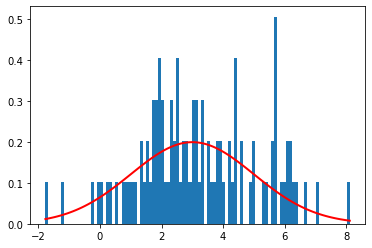

In [11]:
print(f'mu - mean(s) = {abs(mu-np.mean(s))}')
print(f'sigma - std(s) = {abs(sigma - np.std(s, ddof=1))}')

import matplotlib.pyplot as plt
n = 100
s = np.random.normal(mu, sigma, size=(n,))
count, bins, ignored = plt.hist(s, n, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
        np.exp( - (bins - mu) ** 2 / (2 * sigma ** 2)),
        linewidth=2, color='r')
plt.show()

##### ramdom seed

random seed 能生成同样的random sample，但是只对seed后的第一次有效

In [12]:
print('-----seed every time-----')
for i in range(5):
    np.random.seed(3)
    print(np.random.randint(10, 100, size=(8,)))

print('------seed one time------')
np.random.seed(3)
for i in range(5):
    print(np.random.randint(10, 100, size=(8,)))

-----seed every time-----
[34 13 66 82 10 31 29 84]
[34 13 66 82 10 31 29 84]
[34 13 66 82 10 31 29 84]
[34 13 66 82 10 31 29 84]
[34 13 66 82 10 31 29 84]
------seed one time------
[34 13 66 82 10 31 29 84]
[51 20 31 48 30 54 49 24]
[36 91 32 76 12 73 70 11]
[61 79 39 34 72 17 53 43]
[89 58 47 30 59 31 88 38]


## numpy 数组切片

### 1-d

In [13]:
arr = np.arange(10)
arr[:], arr[:3], arr[3:]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2]),
 array([3, 4, 5, 6, 7, 8, 9]))

### 2-d

`arr[1:2,2:3]` 表示先取出[1:2]的元素A，再对A取[2:3]

> 可以理解为linux里面的管道，前一个切片的输出就是后一个切片的输入

In [14]:
arr2 = np.array([[1,2,3,4,5],[6,7,8,9,10]])
arr2[:], arr2[:,:], arr2[1:2,3:], arr2[:,3:]

(array([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]]),
 array([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]]),
 array([[ 9, 10]]),
 array([[ 4,  5],
        [ 9, 10]]))

### 3-d

同样，利用管道的输入输出传递来理解

In [3]:
arr3 = np.array([ \
        [ \
            [21,22,23],[24,25,26],[27,28,29] \
        ],\
        [ \
            [31,32,33],[34,35,36],[37,38,39] \
        ],\
        [ \
            [11,12,13],[14,15,16],[17,18,19] \
        ],\
    ])               

这次反过来，我把要过滤的要求说出来，练习写表达式让它得到正确的答案。

**练习1**: 我要取每个数组里面的第二个元素

- 第三维就要取全部[:]
- 第二维也取全部[:]
- 第一维取[1:2]

In [4]:
arr3[:,:,1:2]

array([[[22],
        [25],
        [28]],

       [[32],
        [35],
        [38]],

       [[12],
        [15],
        [18]]])

**练习2**: 我要取第二个数组里的第一行

- 最外层取第二个元素[1:2]
- 二维数组第一行是[0:1]
- 最内层是取全部[:]

In [5]:
arr3[1:2,0:1,:]

array([[[31, 32, 33]]])

### 增加维度（np.newaxis）

In [8]:
a[:], a[::], a[...]

(array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]))

**前置知识**

numpy不认为一个行向量是一个`一行几列`的数组，看下面的例子

In [116]:
v1 = np.array([1, 2, 3])
v2 = np.array([[1, 2, 3]])
print('v1:', v1.shape, v1.ndim)
print('v2:', v2.shape, v2.ndim)

# 所以，v2变成v1要这么做：
v3 = v2.reshape((3,))
print('v3:', v3.shape, v3.ndim)

v1: (3,) 1
v2: (1, 3) 2
v3: (3,) 1


In [4]:
v3  = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
v31 = v3[np.newaxis, :]    # 等同于 v3[None]
v32 = v3[:, np.newaxis]
v33 = v3[np.newaxis, :, :] # v33=v31, 在最外层加不在意后面写没写全
v34 = v3[:, np.newaxis, :] # v34=v32, 子级不管写在哪，都是给次顶级包一层
v35 = v3[:,:,np.newaxis]   # 最终得证，把newaxis写在第几维就是包第几维
v36 = v3[:,:,:,np.newaxis] # 增加一个维度的话，就成了把每个元素包一维了
print(0, 'shape:', v3.shape)
print(1, v31, 'shape:', v31.shape)
print(2, v32, 'shape:', v32.shape)
print(3, v33, 'shape:', v33.shape)
print(4, v34, 'shape:', v34.shape)
print(5, v35, 'shape:', v35.shape)
print(6, v36, 'shape:', v36.shape)

0 shape: (2, 2, 2)
1 [[[[1 2]
   [3 4]]

  [[5 6]
   [7 8]]]] shape: (1, 2, 2, 2)
2 [[[[1 2]
   [3 4]]]


 [[[5 6]
   [7 8]]]] shape: (2, 1, 2, 2)
3 [[[[1 2]
   [3 4]]

  [[5 6]
   [7 8]]]] shape: (1, 2, 2, 2)
4 [[[[1 2]
   [3 4]]]


 [[[5 6]
   [7 8]]]] shape: (2, 1, 2, 2)
5 [[[[1 2]]

  [[3 4]]]


 [[[5 6]]

  [[7 8]]]] shape: (2, 2, 1, 2)
6 [[[[1]
   [2]]

  [[3]
   [4]]]


 [[[5]
   [6]]

  [[7]
   [8]]]] shape: (2, 2, 2, 1)


**总结**

`np.newaxis`就是用来增加维度的，把newaxis写在第几维就是包第几维

### ...和None

- `...`是[:,:,:]的省略写法，就是取全的意思
- `None`是`np.newaxis`

In [205]:
print(1, grid[...,None])
#等价于, 就是上一单元里的最后一次尝试，在最低维里面加一维，就是把单个元素包了起来
grid[:,:,None]
grid[:,:,np.newaxis]
grid[...,np.newaxis]

# 但这里不能补全为 grid[:,:,:] 因为它本身就是取全部三维数组元素的含义，越界了
# 所以它只是展开了n-1维
print(2, grid[...,:])

#### 下面这两个还是看输出吧，看不懂

# 所以下面这个就是 grid[:,[2]]
# 这应该是一个fancy indexing吧？
print(3, grid[...,[2]])  # 可以用来取函数第N列

print(grid[:,2])
print(4, grid[...,2])    # 可以用来取函数第N列再排成一行

1 [[[1]
  [2]
  [3]]

 [[4]
  [5]
  [9]]]
2 [[1 2 3]
 [4 5 9]]
3 [[3]
 [9]]
[3 9]
4 [3 9]


In [168]:
cub = np.arange(27).reshape((3,3,3))
# print(1, cub[...,None]) # 把最内层由行改成了列(升了一维)
print(2, cub[...,:])    # 又还原回来了
print(3, cub[...,[2]])  # 可以用来取函数第N列，超过二维就就取最低两维的第N列，然后再平行铺开
print(4, cub[...,2])    # 可以用来取函数第N列再排成一行，超过二维就取最低两维，然后再平行铺开，

# 最后两个例子还是看输出吧

2 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
3 [[[ 2]
  [ 5]
  [ 8]]

 [[11]
  [14]
  [17]]

 [[20]
  [23]
  [26]]]
4 [[ 2  5  8]
 [11 14 17]
 [20 23 26]]


### 数组合并

> 全部拼接传参时自己就要把参数包到数组里，注意

In [123]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

In [124]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

# 默认是行拼接，列不变
# 其实就是 axis 参数默认为0
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [125]:
# 如果要行拼接，axis=1即可
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [126]:
# 形状不同就用np.vstack, np.hstack显式拼接
print(np.vstack([x, grid]))
# print(np.hstack([x, grid])) # 形状不一样强行拼接会报错
z = np.array([[3],[4]])
print(np.hstack([z, grid]))

[[1 2 3]
 [1 2 3]
 [4 5 6]]
[[3 1 2 3]
 [4 4 5 6]]


### 数组分割

In [73]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

# 要使用hsplit, vsplit 需要np.arry对象，应该要用到ndim等属性
np.hsplit(np.array(x), [3])

# 多维
grid = np.arange(16).reshape((4, 4))
upper, lower = np.vsplit(grid, [2])
left,  right = np.hsplit(grid, [2])

upper, lower, left, right

[1 2 3] [99 99] [3 2 1]


(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]]))

> 记住`hsplit`, `vsplit`传参是`[n]`而不是`n`就好了

In [46]:
d1211 = np.ones((1,2,1,1),np.int)
d244 + d1211

array([[[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]]])

## 索引和切片练习

`...`是几维切片的简写，展开的时候要展开几维取决于它写的位置

In [103]:
a = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[11,12,13],[14,15,16],[17,18,19]]])
a[:], a[::], a[...], a[...,::], a[...,::,::]

# 可见三维数组的话，...后面再组两次都会合理展开

(array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]))

In [104]:
# 取第二列， 此时后面还有1维，所以自动展开了两维
# :和::意思是一样的，并不是取一层还是两层
# 而是加不加步长的区别

a[:,:, 1], a[::,::,1], a[...,1]

(array([[ 2,  5,  8],
        [12, 15, 18]]),
 array([[ 2,  5,  8],
        [12, 15, 18]]),
 array([[ 2,  5,  8],
        [12, 15, 18]]))

In [46]:
# 最后一维反转，这通常用于图片的gbr翻转为rbg

a[:,:,::-1], a[::,::,::-1],a[...,::-1]

(array([[[ 3,  2,  1],
         [ 6,  5,  4],
         [ 9,  8,  7]],
 
        [[13, 12, 11],
         [16, 15, 14],
         [19, 18, 17]]]),
 array([[[ 3,  2,  1],
         [ 6,  5,  4],
         [ 9,  8,  7]],
 
        [[13, 12, 11],
         [16, 15, 14],
         [19, 18, 17]]]),
 array([[[ 3,  2,  1],
         [ 6,  5,  4],
         [ 9,  8,  7]],
 
        [[13, 12, 11],
         [16, 15, 14],
         [19, 18, 17]]]))

In [105]:
# 第一维取满，第二维倒取
# 这在画图里能上下翻转
# 这里...后面还有两维，所以它只展开了一维

a[:,::-1], a[::,::-1], a[...,::-1,::]

(array([[[ 7,  8,  9],
         [ 4,  5,  6],
         [ 1,  2,  3]],
 
        [[17, 18, 19],
         [14, 15, 16],
         [11, 12, 13]]]),
 array([[[ 7,  8,  9],
         [ 4,  5,  6],
         [ 1,  2,  3]],
 
        [[17, 18, 19],
         [14, 15, 16],
         [11, 12, 13]]]),
 array([[[ 7,  8,  9],
         [ 4,  5,  6],
         [ 1,  2,  3]],
 
        [[17, 18, 19],
         [14, 15, 16],
         [11, 12, 13]]]))

In [98]:
# 两者结合即为上下打开翻转

a[:,::-1, ::-1], a[::,::-1,::-1], a[...,::-1,::-1]

(array([[[ 9,  9,  7],
         [ 6, 19, 19],
         [ 3,  3,  1]],
 
        [[19, 19, 17],
         [16, 16, 14],
         [13, 13, 11]]]),
 array([[[ 9,  9,  7],
         [ 6, 19, 19],
         [ 3,  3,  1]],
 
        [[19, 19, 17],
         [16, 16, 14],
         [13, 13, 11]]]),
 array([[[ 9,  9,  7],
         [ 6, 19, 19],
         [ 3,  3,  1]],
 
        [[19, 19, 17],
         [16, 16, 14],
         [13, 13, 11]]]))

In [119]:
# ...好像是根据写在哪一层展开的？
a[...,::,0], a[...,0], a[::,::,0], a[::,0]

(array([[ 1,  4,  7],
        [11, 14, 17]]),
 array([[ 1,  4,  7],
        [11, 14, 17]]),
 array([[ 1,  4,  7],
        [11, 14, 17]]),
 array([[ 1,  2,  3],
        [11, 12, 13]]))

In [148]:
b = np.array([[[1,2,3],[4,5,6],[7,8,9]],[[11,12,13],[14,15,16],[17,18,19]]])
b[0,1,0] = 19
# 比较0，2两列的每一个元素，把数值较大的一个赋值给索引1列的相应位置
c = np.fmax(b[...,0], b[...,1])#, out=b[...,2]) 
b, c, b[...,2], b.shape, c.shape, b[...,2].shape

(array([[[ 1,  2,  3],
         [19,  5,  6],
         [ 7,  8,  9]],
 
        [[11, 12, 13],
         [14, 15, 16],
         [17, 18, 19]]]),
 array([[ 2, 19,  8],
        [12, 15, 18]]),
 array([[ 3,  6,  9],
        [13, 16, 19]]),
 (2, 3, 3),
 (2, 3),
 (2, 3))

In [146]:
c.copy().reshape(2,3,1), c[...,np.newaxis], c[...,None], c[...,np.newaxis,::]

(array([[[ 2],
         [19],
         [ 8]],
 
        [[12],
         [15],
         [18]]]),
 array([[[ 2],
         [19],
         [ 8]],
 
        [[12],
         [15],
         [18]]]),
 array([[[ 2],
         [19],
         [ 8]],
 
        [[12],
         [15],
         [18]]]),
 array([[[ 2, 19,  8]],
 
        [[12, 15, 18]]]))

In [135]:
ccc = np.zeros((4,4))
# 这两种reshape传参都可以
ccc.reshape(2,2,4)
ccc.reshape((2,2,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]]])